Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the data from csv file to Pandas DataFrame

train = pd.read_csv('/content/Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test = pd.read_csv('/content/Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train_len = len(train)
test_len = len(test)

df = pd.concat([train, test], axis = 0)

In [5]:
df.head()
df.shape

(14204, 12)

In [6]:
df.reset_index(drop = True, inplace = True)

df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [7]:
df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [8]:
# number of data points & number of features

df.shape

(14204, 12)

In [9]:
# getting some information about thye dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [10]:
# checking for missing values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [11]:
# mean value of "Item_Weight" column

df['Item_Weight'].mean()

12.792854228644284

In [12]:
# filling the missing values in "Item_weight column" with "Mean" value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [13]:
# mode of "Outlet_Size" column

df['Outlet_Size'].mode()

0    Medium
dtype: object

In [14]:
# filling the missing values in "Outlet_Size" column with Mode

mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [15]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [16]:
miss_values = df['Outlet_Size'].isnull()   

In [17]:
print(miss_values)

0        False
1        False
2        False
3         True
4        False
         ...  
14199    False
14200    False
14201     True
14202     True
14203     True
Name: Outlet_Size, Length: 14204, dtype: bool


In [18]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [19]:
# checking for missing values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

Data Analysis

In [20]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [21]:
sns.set()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


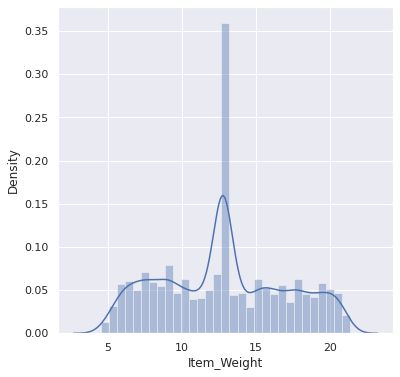

In [22]:
# Item_Weight distribution

plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


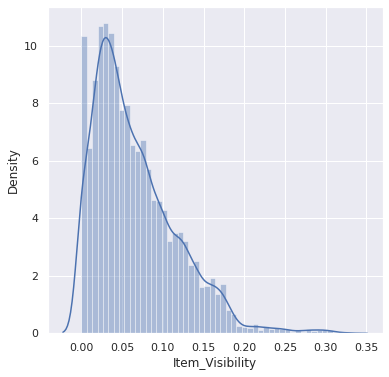

In [23]:
# Item Visibility distribution

plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


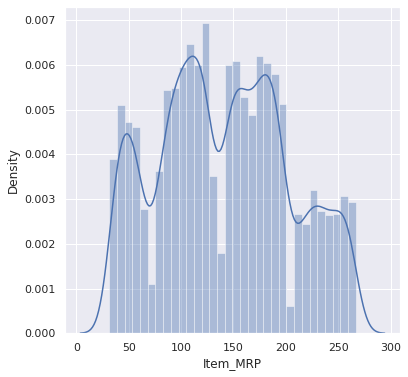

In [24]:
# Item MRP distribution

plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


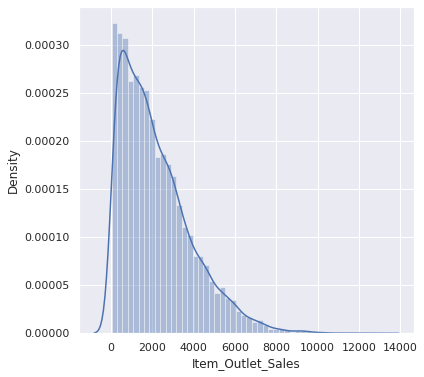

In [25]:
# Item_Outlet_Sales distribution

plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

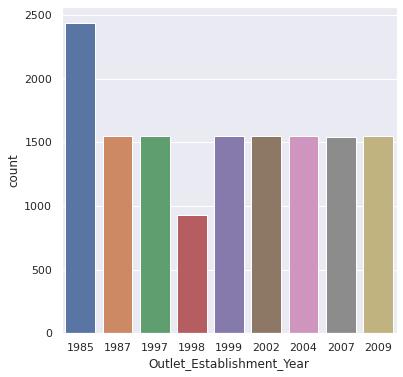

In [26]:
# Outlet_Establishment_Year column

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data = df)
plt.show()

Categorical Features

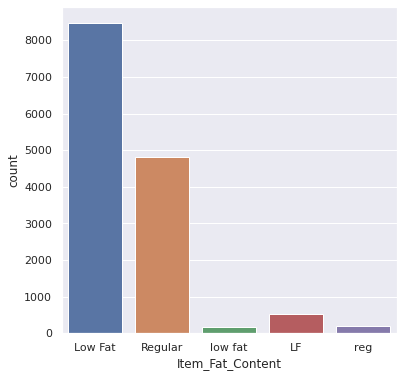

In [27]:
# Item_Fat_Content column

plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data = df)
plt.show()

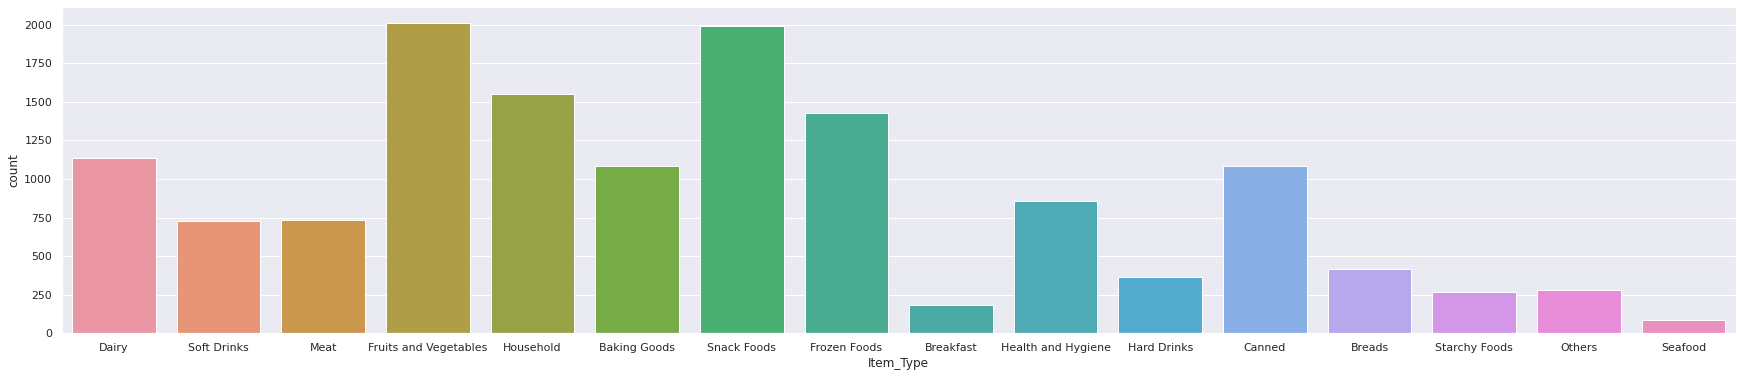

In [28]:
# Item_Type column

plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data = df)
plt.show()

Data Pre-Processing

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [31]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [32]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [33]:
encoder = LabelEncoder()

In [34]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

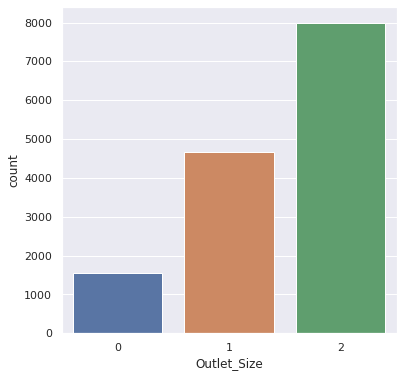

2    7996
1    4655
0    1553
Name: Outlet_Size, dtype: int64

In [35]:
# Feature Outlet_Size

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data = df)
plt.show()

df.Outlet_Size.value_counts()

1 --> Medium

0 --> High

2 --> Small

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and Target

In [37]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [38]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [39]:
test = test.drop(columns = ['Item_Outlet_Sales'])
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8523,1114,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
8524,1078,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
8525,1420,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
8526,817,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
8527,1197,12.792854,1,0.118599,4,234.2300,5,1985,1,2,3


In [40]:
X = train.drop(columns=['Item_Outlet_Sales', 'Outlet_Establishment_Year'], axis=1)
Y = train['Item_Outlet_Sales']

In [41]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Size  \
0             4  249.8092                  9            1   
1

In [42]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into Training data & Testing Data

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


Machine Learning Model Training

Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [46]:
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [47]:
training_data_prediction = linear_regression.predict(X_train)

error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.5041502042619064


In [48]:
test_data_prediction = linear_regression.predict(X_test)

error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.5011641657925496


Lasso Regularization

In [49]:
from sklearn.linear_model import Lasso

In [50]:
lasso_model = Lasso()

lasso_model.fit(X_train, Y_train)

Lasso()

In [51]:
training_data_prediction = lasso_model.predict(X_train)

error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.5040083369053447


In [52]:
test_data_prediction = lasso_model.predict(X_test)

error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.5010621996467108


Random Forest Regression

In [53]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

In [54]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [55]:
training_data_prediction = regressor.predict(X_train)

error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.9376877271207755


In [56]:
test_data_prediction = regressor.predict(X_test)

error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.546124673799826


XGBoost Regressor

In [57]:
from xgboost import XGBRegressor

regressor = XGBRegressor()

In [58]:
regressor.fit(X_train, Y_train)

[09:15:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [59]:
training_data_prediction = regressor.predict(X_train)

error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.6326253795005978


In [60]:
test_data_prediction = regressor.predict(X_test)

error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.5969603651895634


Well, As we can see above for every model we have R-Square error score, so we can decide from that which is best for testing further data:

1. For linear regression: 50.11%
2. For lasso: 50.10%
3. For radom forest: 53%
4. for XGBoost: 59%

These errors are recorded on test data so, In this case, Lasso is the best model. 

In [61]:
# prediction on test data

In [62]:
x_test = test.drop(columns='Outlet_Establishment_Year', axis=1)
x_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
8523,1114,20.750000,0,0.007565,13,107.8622,9,1,0,1
8524,1078,8.300000,1,0.038428,4,87.3198,2,2,1,1
8525,1420,14.600000,0,0.099575,11,241.7538,0,2,2,0
8526,817,7.315000,0,0.015388,13,155.0340,2,2,1,1
8527,1197,12.792854,1,0.118599,4,234.2300,5,1,2,3
...,...,...,...,...,...,...,...,...,...,...
14199,233,10.500000,1,0.013496,13,141.3154,8,2,0,1
14200,308,7.600000,1,0.142991,15,169.1448,3,1,2,2
14201,1426,10.000000,0,0.073529,8,118.7440,7,2,1,1
14202,521,15.300000,1,0.000000,3,214.6218,2,2,1,1


In [63]:
lasso_model.fit(X, Y)

Lasso()

In [64]:
pred = lasso_model.predict(x_test)
pred

array([1959.14575914, 1027.47101788, 2252.4977373 , ..., 1713.28206107,
       3056.98418423, 1127.33945868])

In [65]:
submission = pd.DataFrame()
submission['id'] = test['Item_Identifier']
submission['sales'] = pred
submission

,id,sales
8523,1114,1959.145759
8524,1078,1027.471018
8525,1420,2252.497737
8526,817,2054.796896
8527,1197,5079.112588
...,...,...
14199,233,2348.957547
14200,308,3092.063715
14201,1426,1713.282061
14202,521,3056.984184


In [66]:
submission.to_csv('Final_Sales.csv', index = False)